In [1]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from devol import DEvol, GenomeHandler
import numpy as np
from keras.models import load_model
from keras import backend as K
import keras
from keras.callbacks import TensorBoard

%config IPCompleter.greedy = True
from __future__ import print_function

/home/alemag/anaconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Prepare dataset
This problem uses mnist, a handwritten digit classification problem used for many introductory deep learning examples. Here, we load the data and prepare it for use by the GPU. We also do a one-hot encoding of the labels.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
#number of classes to predict, 2 or 7
num_classes = 2

# input image dimensions
img_rows, img_cols = 28, 28

#set seed for reproducibility / used inside Keras function we can't see
seed = 16
np.random.seed(seed)

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Only look at 2's and 7's
train_picks = np.logical_or(y_train==2,y_train==7)
test_picks = np.logical_or(y_test==2,y_test==7)

x_train = x_train[train_picks]
x_test = x_test[test_picks]
y_train = np.array(y_train[train_picks]==7,dtype=int)
y_test = np.array(y_test[test_picks]==7,dtype=int)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#convert to binary [0,1],[1,0] -> [1],[0]
#y_train = np.argmax(y_train,axis=1)
#y_test = np.argmax(y_test,axis=1)

dataset = ((x_train, y_train), (x_test, y_test))

x_train shape: (12223, 28, 28, 1)
12223 train samples
2060 test samples


In [4]:
print(len(x_train[0][0]))

28


### Prepare the genome configuration
The `GenomeHandler` class handles the constraints that are imposed upon models in a particular genetic program. In this example, a genome is allowed **up to** 6 convolutional layeres, 3 dense layers, 256 feature maps in each convolution, and 1024 nodes in each dense layer. It also specifies three possible activation functions. See `genome-handler.py` for more information.

In [5]:
max_conv_layers = 3
max_dense_layers = 2 # including final softmax layer
max_conv_kernals = 256
max_dense_nodes = 1024
input_shape = x_train.shape[1:]
#num_classes = 10

genome_handler = GenomeHandler(max_conv_layers, max_dense_layers, max_conv_kernals, \
                    max_dense_nodes, input_shape, num_classes)

### Create and run the genetic program
The next, and final, step is create a `DEvol` and run it. Here we specify a few settings pertaining to the genetic program. In this example, we have 10 generations of evolution, 20 members in each population, and 3 epochs of training used to evaluate each model's fitness. The program will save each genome's encoding, as well as the model's loss and accuracy, in a `.csv` file printed at the beginning of program.

In [6]:
%%time
num_generations = 2
population_size = 2
num_epochs = 1

devol = DEvol(genome_handler)
model = devol.run(dataset, num_generations, population_size, num_epochs)
model.summary()

model.save('GAModelWithTB.h5')

Genome encoding and accuracy data stored at Thu Jun 14 11:17:50 2018.csv 


model 1/2 - generation 1/2:

Instructions for updating:
Use the retry module or similar alternatives.
Train on 12223 samples, validate on 2060 samples
Epoch 1/1
12223/12223 [==============================] - 58s 5ms/step - loss: 7.8383 - acc: 0.5126 - val_loss: 8.0747 - val_acc: 0.4990

model 2/2 - generation 1/2:

Train on 12223 samples, validate on 2060 samples
Epoch 1/1
12223/12223 [==============================] - 1279s 105ms/step - loss: 8.2475 - acc: 0.4870 - val_loss: 8.0434 - val_acc: 0.5010
An error occurred and the model could not train. Assigned poor score.


RuntimeError: The Session graph is empty.  Add operations to the graph before calling run().

In [7]:
time = "10:20"

In [ ]:
%config IPCompleter.greedy = True
%%time

In [ ]:
check = "check"

In [ ]:
%%time
print(check)

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("GA_gen1.csv")

In [16]:
df.tail()

,Conv0 active,Conv0 num filters,Conv0 batch normalization,Conv0 activation,Conv0 dropout,Conv0 max pooling,Conv1 active,Conv1 num filters,Conv1 batch normalization,Conv1 activation,...,Conv5 dropout,Conv5 max pooling,Dense0 active,Dense0 num nodes,Dense0 batch normalization,Dense0 activation,Dense0 dropout,Optimizer,Val Loss,Val Accuracy
45,1,16,1,0,4,1,1,128,1,1,...,0,0,0,128,1,1,0,3,0.049554,0.982039
46,1,256,1,0,8,0,0,8,1,0,...,0,0,1,256,0,0,9,3,0.049668,0.986408
47,1,16,1,1,4,1,1,128,1,0,...,6,1,0,16,0,1,6,3,0.055033,0.983495
48,1,16,1,1,4,1,1,128,1,0,...,0,0,1,256,0,0,9,3,0.045710,0.986893
49,1,16,1,1,2,1,0,64,1,1,...,0,0,0,256,0,0,9,3,0.067965,0.983010


/home/alemag/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


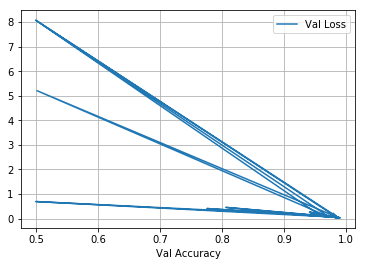

In [43]:
df.plot(x="Val Accuracy", y="Val Loss", grid="True")
plt.show()

In [56]:
result = df.sort_values(by=['Val Accuracy', 'Val Loss'])

In [59]:
result.head()

,Conv0 active,Conv0 num filters,Conv0 batch normalization,Conv0 activation,Conv0 dropout,Conv0 max pooling,Conv1 active,Conv1 num filters,Conv1 batch normalization,Conv1 activation,...,Conv5 dropout,Conv5 max pooling,Dense0 active,Dense0 num nodes,Dense0 batch normalization,Dense0 activation,Dense0 dropout,Optimizer,Val Loss,Val Accuracy
5,1,16,1,1,2,2,1,256,1,1,...,4,0,1,512,0,1,10,3,0.695511,0.499029
2,1,64,1,1,3,2,1,8,1,1,...,10,1,0,32,0,0,5,1,8.074696,0.499029
12,1,16,0,1,2,1,0,64,1,1,...,5,2,1,1024,0,0,10,3,8.074696,0.499029
9,1,128,1,1,5,1,1,128,0,0,...,4,1,0,128,0,1,3,2,5.207760,0.500971
34,1,16,1,1,2,1,0,64,1,1,...,1,0,0,256,0,1,6,3,0.411944,0.775243
